# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Empty lists to append data and the base url to generate query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

# Count and set number to print the progress:
count = 1
set_number = 1
initial_time = time.time()

print("Beginning Data Retrieval")
print("-----------------------------")

# Start the loop
for city in cities:
    
    # Get query url for each city and retrieve data
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    data = response.json()
    
    try:
        
        # Append data to the empty lists
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        windspeed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        
        print(f"Processing Record {count} of Set {set_number} | {city}")
        
        count = count + 1
        
        if (count > 50) & (set_number == 1):
            count = 0
            set_number = set_number + 1
            endtime = time.time()
            time.sleep(60-(endtime-initial_time))
            initial_time = time.time()
            
        elif (set_number > 1) & (count > 49):
            count = 0
            set_number = set_number + 1
            endtime = time.time()
            time.sleep(60-(endtime-initial_time))
            initial_time = time.time()
            
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | port augusta
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | khuzhir
Processing Record 7 of Set 1 | fort nelson
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | khani
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | teknaf
Processing Record 19 of Set 1 | benicarlo
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | pala
Processing Record 22 of Set 1 | strezhevoy
Processing Record 23 of S

Processing Record 38 of Set 4 | kilindoni
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | scarborough
Processing Record 41 of Set 4 | morondava
City not found. Skipping...
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | hermosillo
Processing Record 44 of Set 4 | kota kinabalu
Processing Record 45 of Set 4 | nabire
Processing Record 46 of Set 4 | baker city
Processing Record 47 of Set 4 | olavarria
Processing Record 48 of Set 4 | glenwood springs
Processing Record 49 of Set 4 | kindu
City not found. Skipping...
Processing Record 0 of Set 5 | yinchuan
Processing Record 1 of Set 5 | coahuayana
Processing Record 2 of Set 5 | sao mateus do sul
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | camana
Processing Record 5 of Set 5 | machilipatnam
Processing Record 6 of Set 5 | veraval
Processing Record 7 of Set 5 | komsomolskiy
Processing Record 8 of Set 5 | nome
Processing Record 9 of Set 5 | mayo
Processing Record 10

Processing Record 26 of Set 8 | canon city
Processing Record 27 of Set 8 | nago
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 8 | utica
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | goure
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | mahebourg
Processing Record 35 of Set 8 | bakaly
City not found. Skipping...
Processing Record 36 of Set 8 | huautla
Processing Record 37 of Set 8 | sabzevar
City not found. Skipping...
Processing Record 38 of Set 8 | sorland
Processing Record 39 of Set 8 | puerto ayacucho
Processing Record 40 of Set 8 | vawkavysk
Processing Record 41 of Set 8 | mersing
Processing Record 42 of Set 8 | sawakin
Processing Record 43 of Set 8 | ostrovnoy
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | vila praia de ancora
Processing Record 46 of Set 8 | mumford
Processing Record 

Processing Record 14 of Set 12 | dingle
Processing Record 15 of Set 12 | ulladulla
Processing Record 16 of Set 12 | nigde
Processing Record 17 of Set 12 | khuzdar
Processing Record 18 of Set 12 | sept-iles
Processing Record 19 of Set 12 | polunochnoye
City not found. Skipping...
Processing Record 20 of Set 12 | amga
Processing Record 21 of Set 12 | hutang
City not found. Skipping...
Processing Record 22 of Set 12 | garowe
Processing Record 23 of Set 12 | columbus
Processing Record 24 of Set 12 | taihe
Processing Record 25 of Set 12 | izhma
Processing Record 26 of Set 12 | upington
Processing Record 27 of Set 12 | saurimo
Processing Record 28 of Set 12 | iracoubo
Processing Record 29 of Set 12 | ahipara
Processing Record 30 of Set 12 | koscierzyna
Processing Record 31 of Set 12 | kisangani
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Generate a DataFrame
city_data = pd.DataFrame({"City":city_name, "Lat":latitude, "Lng":longitude, "Max Temp":max_temp, 
                         "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":windspeed, "Country":country,
                         "Date":date})

# Export the DataFrame to a csv file called "Weather_by_City.csv"
city_data.to_csv("output_data/Weather_by_City.csv")

# Display the DataFrame
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,44.04,97,13,2.24,BR,1627879406
1,Port Augusta,-32.5000,137.7667,62.71,70,86,18.61,AU,1627879406
2,Busselton,-33.6500,115.3333,58.05,66,100,10.36,AU,1627879407
3,Karratha,-20.7377,116.8463,76.21,25,0,15.41,AU,1627879408
4,Hilo,19.7297,-155.0900,75.79,88,65,6.22,US,1627879004
...,...,...,...,...,...,...,...,...,...
577,Saurimo,-9.6608,20.3916,54.66,44,78,5.23,AO,1627880080
578,Iracoubo,5.4802,-53.2011,76.10,88,22,8.37,GF,1627880080
579,Ahipara,-35.1667,173.1667,55.69,79,35,11.41,NZ,1627880081
580,Kościerzyna,54.1223,17.9812,60.30,92,99,8.61,PL,1627880081


In [13]:
# Calculate statistics and generate a Summary Statistics DataFrame

# Extract "City" column and save it as 'simplified_city_data'
simplified_city_data = city_data.drop(["City", "Country"], axis=1)

# Run Calculations
entry_count = simplified_city_data.count() 
mean = simplified_city_data.mean()
stdev = simplified_city_data.std()
minimum = simplified_city_data.min()

quartile = simplified_city_data.quantile([0.25, 0.5, 0.75])
quartile_25 = quartile.iloc[0,:]
quartile_50 = quartile.iloc[1,:]
quartile_75 = quartile.iloc[2,:]

maximum = simplified_city_data.max()

# Generate a DataFrame
stat_summary = pd.DataFrame({"count":entry_count, "mean":mean, "std":stdev, "min":minimum, "25%":quartile_25,
                            "50%":quartile_50, "75%":quartile_75, "max":maximum})
stat_summary = stat_summary.T
stat_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,18.913665,19.512872,69.696718,69.178694,53.171821,8.041409,1.627880e+09
std,33.400064,91.076468,13.806733,21.296183,39.106475,5.736695,2.153956e+02
min,-54.800000,-179.166700,31.060000,12.000000,0.000000,0.000000,1.627879e+09
25%,-8.409175,-64.740375,59.320000,56.000000,11.250000,3.570000,1.627880e+09
50%,21.386800,26.432850,70.540000,73.000000,59.500000,6.730000,1.627880e+09
75%,46.837200,102.527825,80.657500,87.000000,91.000000,11.307500,1.627880e+09
max,78.218600,179.316700,104.770000,100.000000,100.000000,33.510000,1.627880e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Extract rows with humidity > 100
high_humidity = city_data.loc[city_data["Humidity"] > 100]
high_humidity # The humidity of all cities in the DataFrame is less than or equal to 100 %

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

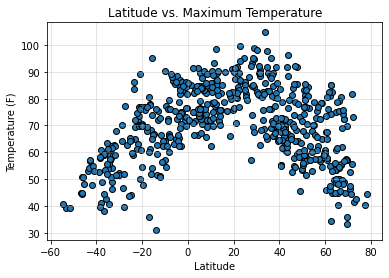

In [15]:
# Get x and y values
lats = city_data["Lat"]
temperature = city_data["Max Temp"]

# Plot, format the plot, and export
plt.scatter(x=lats, y=temperature, edgecolor="black")
plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(alpha=0.4)
plt.savefig("output_data/Fig1_Lat_vs_MaxTemp", facecolor="white")
plt.show()

## Latitude vs. Humidity Plot

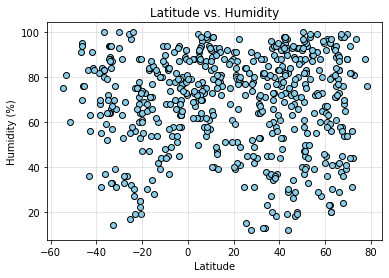

In [16]:
# Get x and y values 
lats = city_data["Lat"]
humid = city_data["Humidity"]

# Plot, format the plot, and export
plt.scatter(x=lats, y=humid, edgecolor="black", color="skyblue")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.4)
plt.savefig("output_data/Fig2_Lat_vs_Humidity", facecolor="white")
plt.show()

## Latitude vs. Cloudiness Plot

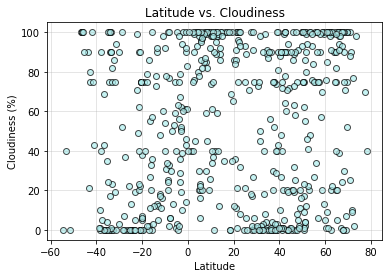

In [17]:
# Get x and y values 
lats = city_data["Lat"]
cloud = city_data["Cloudiness"]

# Plot, format the plot, and export
plt.scatter(x=lats, y=cloud, edgecolor="black", color="paleturquoise", alpha=0.7)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.4)
plt.savefig("output_data/Fig3_Lat_vs_Cloudiness", facecolor="white")
plt.show()

## Latitude vs. Wind Speed Plot

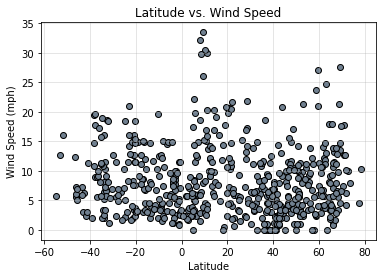

In [18]:
# Get x and y values 
lats = city_data["Lat"]
wind = city_data["Wind Speed"]

# Plot, format the plot, and export
plt.scatter(x=lats, y=wind, edgecolor="black", color="slategray")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.4)
plt.savefig("output_data/Fig4_Lat_vs_WindSpeed", facecolor="white")
plt.show()

## Linear Regression

In [22]:
# Get new lists: northern and southern hemisphere

# First, see if there are any cities at the equator
equator = city_data.loc[city_data["Lat"] == 0] # equator returns an empty DataFrame

# Cities in the northern hemisphere
northern = city_data.loc[city_data["Lat"] > 0] # 390 rows x 9 columns

# Cities in the southern hemisphere
southern = city_data.loc[city_data["Lat"] < 0] #192 rows x 9 columns

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.34322135141348853


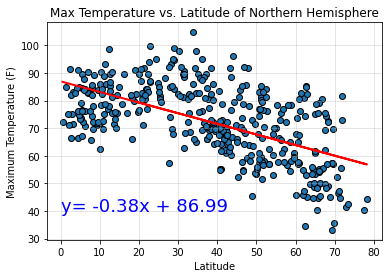

In [23]:
# Get x and y values
lati = northern["Lat"]
north_temp = northern["Max Temp"]

# Calculate the Linear Regression Equation
north_temp_slope, north_temp_intercept, north_temp_rvalue, north_temp_pvalue, north_temp_standerr = linregress(lati, north_temp)
north_temp_fit = north_temp_slope * lati + north_temp_intercept
print(f"The r-value is: {north_temp_rvalue ** 2}")

# Plot 
plt.scatter(x=lati, y=north_temp, edgecolor="black")
plt.plot(lati, north_temp_fit, color="red", linewidth="2")
plt.title("Max Temperature vs. Latitude of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.annotate("y= " + str(round(north_temp_slope, 2)) + "x + " + str(round(north_temp_intercept, 2)), (0,40), 
             fontsize=18, color="blue")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig5_North_Lat_MaxTemp", facecolor="white")

# Draw
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.44895585293788237


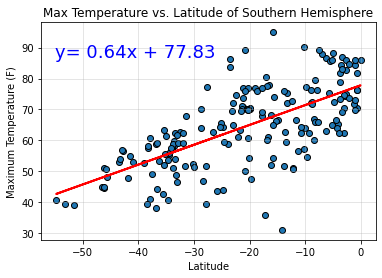

In [24]:
# Get x and y values
latit = southern["Lat"]
south_temp = southern["Max Temp"]

# Calculate the Linear Regression Equation
south_temp_slope, south_temp_intercept, south_temp_rvalue, south_temp_pvalue, south_temp_standerr = linregress(latit, south_temp)
south_temp_fit = south_temp_slope * latit + south_temp_intercept
print(f"The r-value is: {south_temp_rvalue ** 2}")

# Plot 
plt.scatter(x=latit, y=south_temp, edgecolor="black")
plt.plot(latit, south_temp_fit, color="red", linewidth="2")
plt.title("Max Temperature vs. Latitude of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.annotate("y= " + str(round(south_temp_slope, 2)) + "x + " + str(round(south_temp_intercept, 2)), (-55,87), 
             fontsize=18, color="blue")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig6_South_Lat_vs_MaxTemp", facecolor="white")

# Display
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011020027692577983


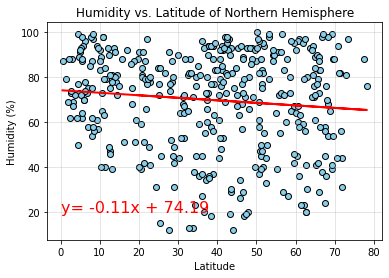

In [27]:
# Get x and y values
latitu = northern["Lat"]
north_humidity = northern["Humidity"]

# Calculate the Linear Regression Equation
north_hum_slope, north_hum_intercept, north_hum_rvalue, north_hum_pvalue, north_hum_standerr = linregress(latitu, north_humidity)
north_hum_fit = north_hum_slope * latitu + north_hum_intercept
print(f"The r-value is: {north_hum_rvalue ** 2}")

# Plot 
plt.scatter(x=latitu, y=north_humidity, edgecolor="black", color="skyblue")
plt.plot(latitu, north_hum_fit, color="red", linewidth="2")
plt.title("Humidity vs. Latitude of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate("y= " + str(round(north_hum_slope, 2)) + "x + " + str(round(north_hum_intercept, 2)), (0,20), 
             fontsize=16, color="red")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig7_North_Lat_vs_Humidity", facecolor="white")

# Display
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0005651752810397585


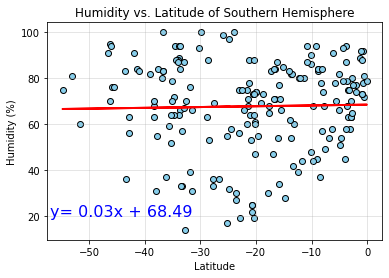

In [29]:
# Get x and y values
latitud = southern["Lat"]
south_humidity = southern["Humidity"]

# Calculate the Linear Regression Equation
south_hum_slope, south_hum_intercept, south_hum_rvalue, south_hum_pvalue, south_hum_standerr = linregress(latitud, south_humidity)
south_hum_fit = south_hum_slope * latitud + south_hum_intercept
print(f"The r-value is: {south_hum_rvalue ** 2}")

# Plot 
plt.scatter(x=latitud, y=south_humidity, edgecolor="black", color="skyblue")
plt.plot(latitud, south_hum_fit, color="red", linewidth="2")
plt.title("Humidity vs. Latitude of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate("y= " + str(round(south_hum_slope, 2)) + "x + " + str(round(south_hum_intercept, 2)), (-57,20), 
             fontsize=16, color="blue")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig8_South_Lat_vs_Humidity", facecolor="white")

# Display
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0014774279144201456


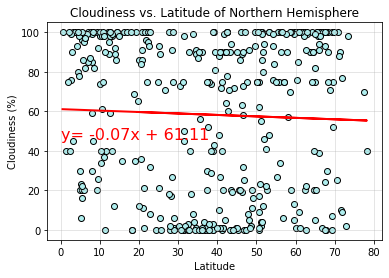

In [31]:
# Get x and y values
latitudes = northern["Lat"]
north_cloudiness = northern["Cloudiness"]

# Calculate the Linear Regression Equation
north_cld_slope, north_cld_intercept, north_cld_rvalue, north_cld_pvalue, north_cld_standerr = linregress(latitudes, north_cloudiness)
north_cld_fit = north_cld_slope * latitudes + north_cld_intercept
print(f"The r-value is: {north_cld_rvalue ** 2}")

# Plot 
plt.scatter(x=latitudes, y=north_cloudiness, edgecolor="black", color="paleturquoise")
plt.plot(latitudes, north_cld_fit, color="red", linewidth="2")
plt.title("Cloudiness vs. Latitude of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate("y= " + str(round(north_cld_slope, 2)) + "x + " + str(round(north_cld_intercept, 2)), (0,46), 
             fontsize=16, color="red")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig9_North_Lat_vs_Cloudiness", facecolor="white")

# Display
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00019606164533652535


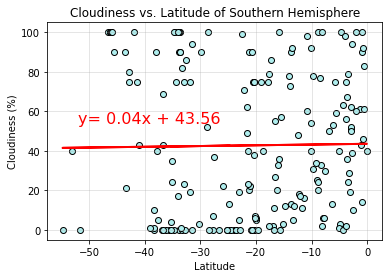

In [32]:
# Get x and y values
latitude_ = southern["Lat"]
south_cloudiness = southern["Cloudiness"]

# Calculate the Linear Regression Equation
south_cld_slope, south_cld_intercept, south_cld_rvalue, south_cld_pvalue, south_cld_standerr = linregress(latitude_, south_cloudiness)
south_cld_fit = south_cld_slope * latitude_ + south_cld_intercept
print(f"The r-value is: {south_cld_rvalue ** 2}")

# Plot 
plt.scatter(x=latitude_, y=south_cloudiness, edgecolor="black", color="paleturquoise")
plt.plot(latitude_, south_cld_fit, color="red", linewidth="2")
plt.title("Cloudiness vs. Latitude of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate("y= " + str(round(south_cld_slope, 2)) + "x + " + str(round(south_cld_intercept, 2)), (-52,54), 
             fontsize=16, color="red")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig10_South_Lat_vs_Cloudiness", facecolor="white")

# Display
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007576427989604411


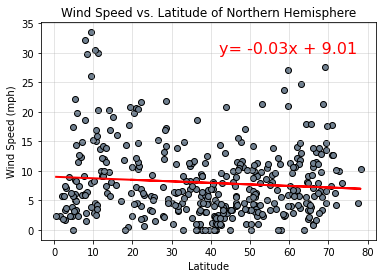

In [34]:
# Get x and y values
latitude_x = northern["Lat"]
north_wind = northern["Wind Speed"]

# Calculate the Linear Regression Equation
north_wind_slope, north_wind_intercept, north_wind_rvalue, north_wind_pvalue, north_wind_standerr = linregress(latitude_x, north_wind)
north_wind_fit = north_wind_slope * latitude_x + north_wind_intercept
print(f"The r-value is: {north_wind_rvalue ** 2}")

# Plot 
plt.scatter(x=latitude_x, y=north_wind, edgecolor="black", color="slategray")
plt.plot(latitude_x, north_wind_fit, color="red", linewidth="2")
plt.title("Wind Speed vs. Latitude of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate("y= " + str(round(north_wind_slope, 2)) + "x + " + str(round(north_wind_intercept, 2)), (42,30), 
             fontsize=16, color="red")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig11_North_Lat_vs_WindSpeed", facecolor="white")

# Display
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.033678620448090314


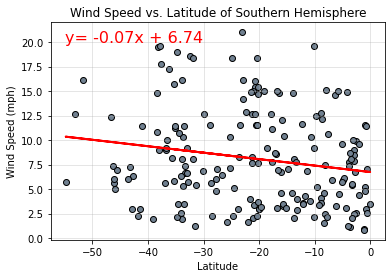

In [36]:
# Get x and y values
latitude_x_ = southern["Lat"]
south_wind = southern["Wind Speed"]

# Calculate the Linear Regression Equation
south_wind_slope, south_wind_intercept, south_wind_rvalue, south_wind_pvalue, south_wind_standerr = linregress(latitude_x_, south_wind)
south_wind_fit = south_wind_slope * latitude_x_ + south_wind_intercept
print(f"The r-value is: {south_wind_rvalue ** 2}")

# Plot 
plt.scatter(x=latitude_x_, y=south_wind, edgecolor="black", color="slategray")
plt.plot(latitude_x_, south_wind_fit, color="red", linewidth="2")
plt.title("Wind Speed vs. Latitude of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate("y= " + str(round(south_wind_slope, 2)) + "x + " + str(round(south_wind_intercept, 2)), (-55,20), 
             fontsize=16, color="red")
plt.grid(alpha=0.4)

# Save the figure
plt.savefig("output_data/Fig12_South_Lat_vs_WindSpeed", facecolor="white")

# Display
plt.show()